Objective of Hyperparameter Tuning

The goal of hyperparameter tuning is to identify the optimal configuration of parameters to balance the model's bias and variance. The hyperparameters I tuned for the SVM were:

Penalty Term (C): Controls the trade-off between maximizing the margin and minimizing classification errors.

Kernel Parameter (𝛾): Defines the influence of a single training example in the RBF kernel.

Class Weighting: Handles class imbalances by adjusting the importance of each class in the loss function.

In [40]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import ValidationCurveDisplay

data = pd.read_csv('data/diabetic_data_formatted.csv')

# Separate features and target
X = data.drop(columns=['readmitted'])
y = data['readmitted']

# Use a fraction of the data for faster processing
X = X.sample(frac=0.1, random_state=42) 
y = y[X.index] 

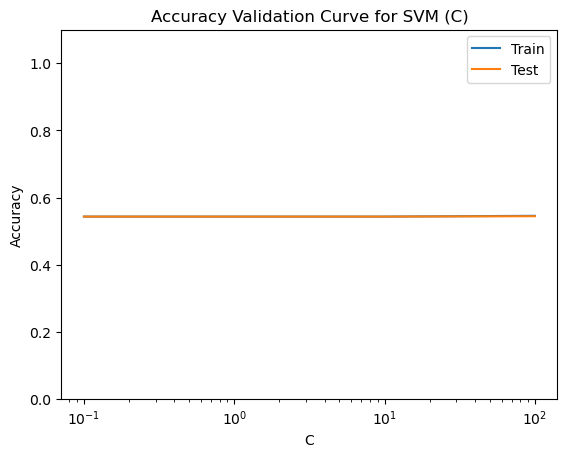

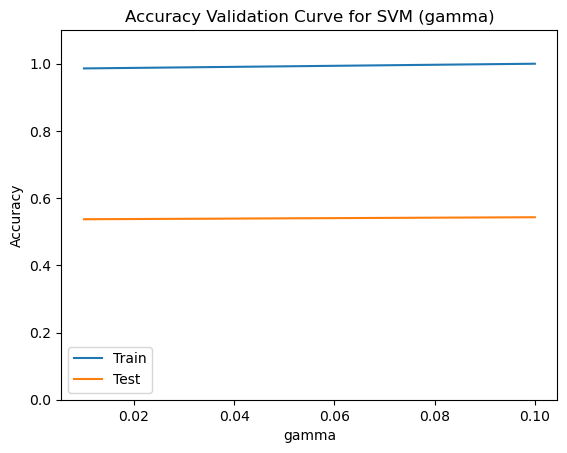

Cross-validation scores for class_weight=None: 0.5432
Cross-validation scores for class_weight=balanced: 0.2974


In [41]:
# Create Validation Curve for SVC hyperparameters
def displayValidationCurve(model, p_name, p_range, score, X_train, y_train):
    try:
        disp = ValidationCurveDisplay.from_estimator(
            model,
            X_train,
            y_train,
            param_name=p_name,
            param_range=p_range,
            score_type="both",
            n_jobs=-1,
            score_name=score,
            cv=4
        )
        disp.ax_.set_title(f"{score} Validation Curve for SVM ({p_name})")
        disp.ax_.set_xlabel(p_name)
        disp.ax_.set_ylim(0.0, 1.1)
        plt.show()
    except ValueError as e:
        print(f"Could not generate validation curve for {p_name}. Error: {e}")

# Instantiate the SVM model
svm_model = SVC(random_state=42)

# Define the dataset variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randint(0, 100))

# Display Validation Curve for "C"
param_name = "C"
param_range = [0.1, 1, 10, 100]
displayValidationCurve(svm_model, param_name, param_range, "Accuracy", X_train, y_train)

# Display Validation Curve for "gamma"
param_name = "gamma"
param_range = [0.1, 0.01]
displayValidationCurve(svm_model, param_name, param_range, "Accuracy", X_train, y_train)

# Testing for "class_weight" parameter with cross-validation
param_name = "class_weight"
param_range = [None, "balanced"]
for value in param_range:
    model = SVC(class_weight=value, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=4, scoring='accuracy', n_jobs=-1)
    print(f"Cross-validation scores for class_weight={value}: {np.mean(scores):.4f}")

Validation Curve Analysis
To explore the effect of 𝐶and 𝛾, validation curves were used. Validation curves visualize the model’s performance across a range of hyperparameter values, showing how training and cross-validation scores vary.

𝐶: [0.1, 1, 10, 100] was tested to observe how varying the penalty term impacts overfitting and underfitting.
𝛾: [0.1,0.01] was analysed for the RBF kernel to understand its sensitivity. 


Validation Curve Results

𝐶: The lack of significant variation in accuracy for training and testing with a change in C suggests the model wasn't sensitive to the hyperparameter. 

𝛾: the high training accuracy compared with the low testing accuracy of gamma indicates potential overfitting. The model is likely too complex for the data which is why I explored feature selection in my github file "SVM Implementation Feature Selection.ipynb". 